# Bagging Regression

### Importando bibliotecas

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import sklearn.datasets
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

### Escolhendo o mesmo DataSet do Exemplo de Árvore de Decisão

Califórnia Housing

In [7]:
dados = sklearn.datasets.fetch_california_housing()
print(dados.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Escolhendo as variáveis predita e preditoras

8 parâmetros para a modelagem

In [8]:
X = dados.data
y = dados.target

print(X.shape, y.shape)

(20640, 8) (20640,)


### Separando teste e treino

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = []
r2scores = []
mse = []

estimators_range = [1 , 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 150, 200, 300]

### Modelagem com vários valores de n_estimators

In [10]:
for n_B in estimators_range:
  bagging = BaggingRegressor(n_estimators = n_B, random_state = 42)

  bagging.fit(X_train, y_train)
  y_pred = bagging.predict(X_test)

  models.append(bagging)
  r2scores.append(r2_score(y_test, y_pred))
  mse.append(mean_squared_error(y_test, y_pred))

### Gráficos de Erros dos Diferentes Modelos

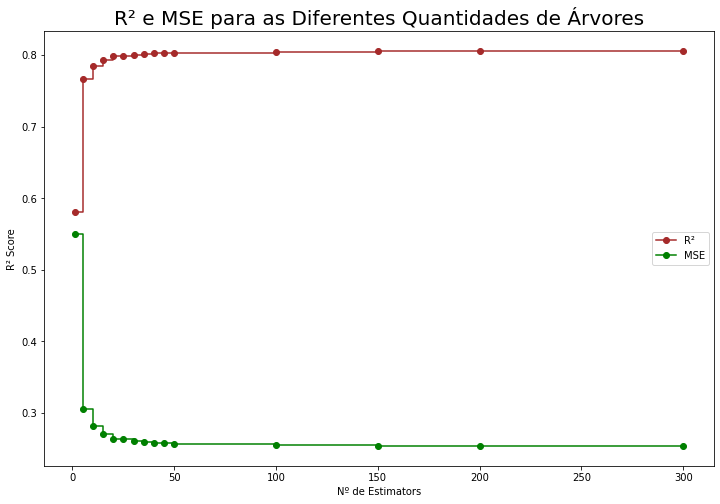

In [11]:
plt.figure(figsize=(12,8))
plt.plot(estimators_range, r2scores, color = 'brown', marker = 'o', drawstyle = 'steps-post', label = 'R²')
plt.plot(estimators_range, mse, color = "green", marker = 'o', drawstyle = 'steps-post', label = 'MSE')
plt.title('R² e MSE para as Diferentes Quantidades de Árvores', fontsize = 20)
plt.xlabel("Nº de Estimators")
plt.ylabel("R² Score")
plt.legend()

plt.show()

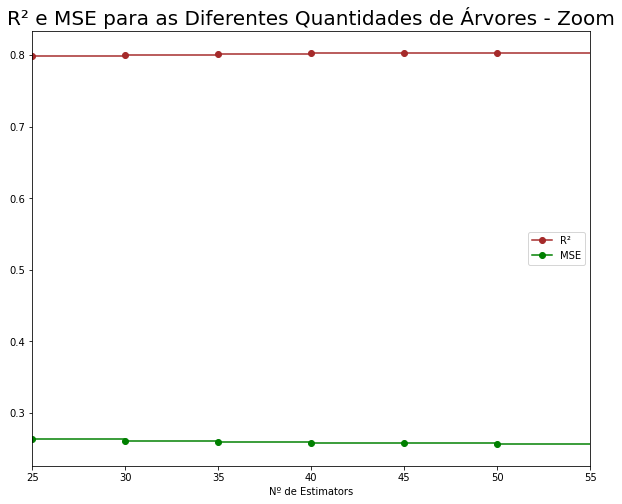

In [12]:
plt.figure(figsize=(10,8))
plt.plot(estimators_range, r2scores, color = 'brown', marker = 'o', drawstyle = 'steps-post', label = 'R²')
plt.plot(estimators_range, mse, color = "green", marker = 'o', drawstyle = 'steps-post', label = 'MSE')
plt.title('R² e MSE para as Diferentes Quantidades de Árvores - Zoom', fontsize = 20)
plt.xlabel("Nº de Estimators")
plt.xlim(25, 55)
plt.legend()

plt.show()

### Modelo Ideal

In [13]:
print("N° de amostras: 40")
print(f"R² Score: \t{r2scores[8]}")
print(f"MSE: \t\t{mse[8]}")

N° de amostras: 40
R² Score: 	0.803189343061665
MSE: 		0.2579024518654837


Outra forma de avaliar o modelo é a partir do Out of Bag error

In [14]:
oob_model = BaggingRegressor(n_estimators = 40, oob_score= True, random_state = 42)

oob_model.fit(X_train, y_train)

print(f"Out of Bag Score: {oob_model.oob_score_}")

Out of Bag Score: 0.796186305016261


### Comparação com Árvore de Decisão

In [15]:
decisiontree = DecisionTreeRegressor(random_state = 42)

decisiontree.fit(X_train, y_train)

y_pred_decisiontree = decisiontree.predict(X_test)

In [16]:
print(f"R² Score:\t {r2_score(y_test, y_pred_decisiontree)}")
print(f"MSE: \t\t {mean_squared_error(y_test, y_pred_decisiontree)}")

R² Score:	 0.622075845135081
MSE: 		 0.495235205629094


### Uma das Árvores de Decisão Bootstraped

[Text(0.6367897158141168, 0.9857142857142858, 'X[0] <= 5.032\nsquared_error = 1.365\nsamples = 10462\nvalue = 2.082'),
 Text(0.3502917693723623, 0.9571428571428572, 'X[0] <= 3.074\nsquared_error = 0.833\nsamples = 8208\nvalue = 1.73'),
 Text(0.14793878517634937, 0.9285714285714286, 'X[2] <= 4.207\nsquared_error = 0.558\nsamples = 3989\nvalue = 1.36'),
 Text(0.055399411150513285, 0.9, 'X[5] <= 2.461\nsquared_error = 0.662\nsamples = 1472\nvalue = 1.657'),
 Text(0.022170215512054624, 0.8714285714285714, 'X[0] <= 2.244\nsquared_error = 0.988\nsamples = 438\nvalue = 2.03'),
 Text(0.009894832582224138, 0.8428571428571429, 'X[5] <= 2.457\nsquared_error = 0.951\nsamples = 200\nvalue = 1.677'),
 Text(0.00979546102966008, 0.8142857142857143, 'X[6] <= 37.9\nsquared_error = 0.827\nsamples = 199\nvalue = 1.637'),
 Text(0.003911954281322418, 0.7857142857142857, 'X[7] <= -122.345\nsquared_error = 0.99\nsamples = 152\nvalue = 1.799'),
 Text(0.0006459150916663755, 0.7571428571428571, 'X[3] <= 1.183\ns

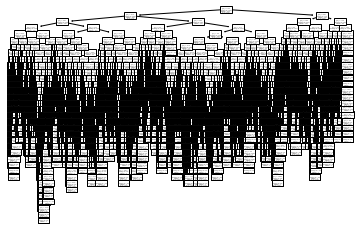

In [17]:
plot_tree(models[0].estimators_[0])